<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_3_Predict_Bike_Rental_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from matplotlib import cm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/bike_sharing_daily.csv")
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,88,1518,1606
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,148,1362,1510
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,68,891,959
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,54,768,822
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,41,1280,1321


In [3]:
data.columns

# instant record index
# season        1-springer, 2-summer, 3-fall, 4-winter
# holiday       1-True 0-False
# weathersit    1-clear, few cloud, partly cloudy
#               2-mist_coludy, mist+broken cloud, mist_few clouds, mist
#               3-light snow, light rain+thunderstom+scattered cloud, light rain+ scatter cloud
#               4-heavy rain + ice pallets+thunderstrom+mist, snow+fog
# temp          Normalized temperature incelsius the values are devided to 41(max)
# winspeed      Normalized winspeed. the values are devided into 67(max)

# casual        Count of casual users
# registered    Count of registered users
# cnt           Count to total rental bikes including both casual and registered

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


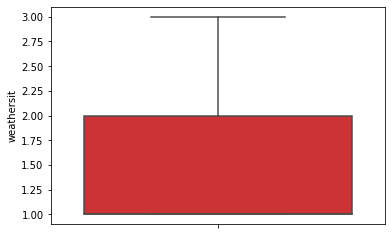

In [6]:
sns.boxplot(data["weathersit"], orient="v", palette="Set1")

Text(0, 0.5, 'Bike Rental Count')

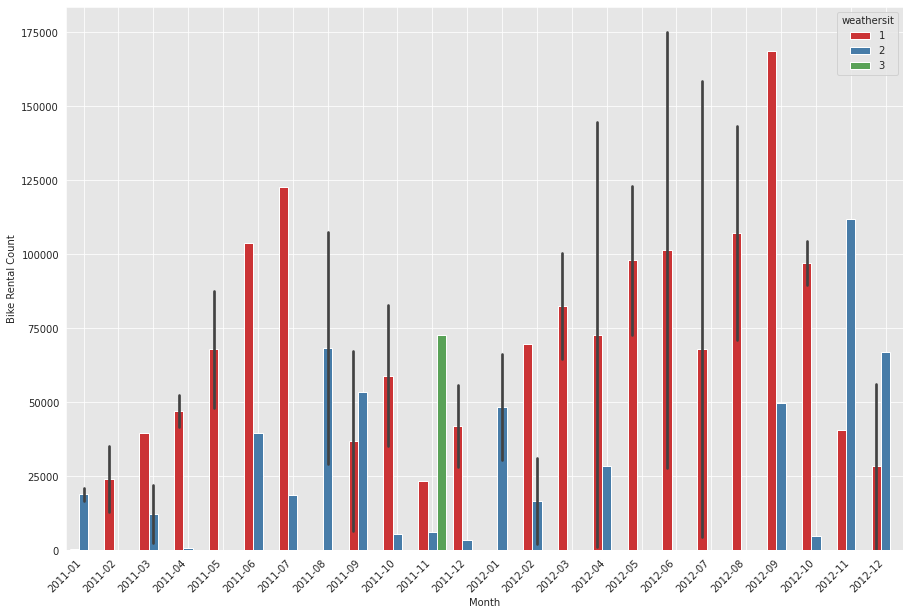

In [7]:

plt.figure(figsize=(15,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
data["dteday_1"] = pd.to_datetime(data["dteday"], dayfirst=False, infer_datetime_format=True, format="%Y-%m").dt.to_period('M')
data_1 =  data.groupby(["dteday_1", "weathersit"])["cnt"].sum().reset_index(name="cnt")
chart = sns.barplot(x=data_1["dteday_1"], y=data_1["cnt"], hue=data["weathersit"], palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Bike Rental Count")

Text(0, 0.5, 'Bike Rental Count')

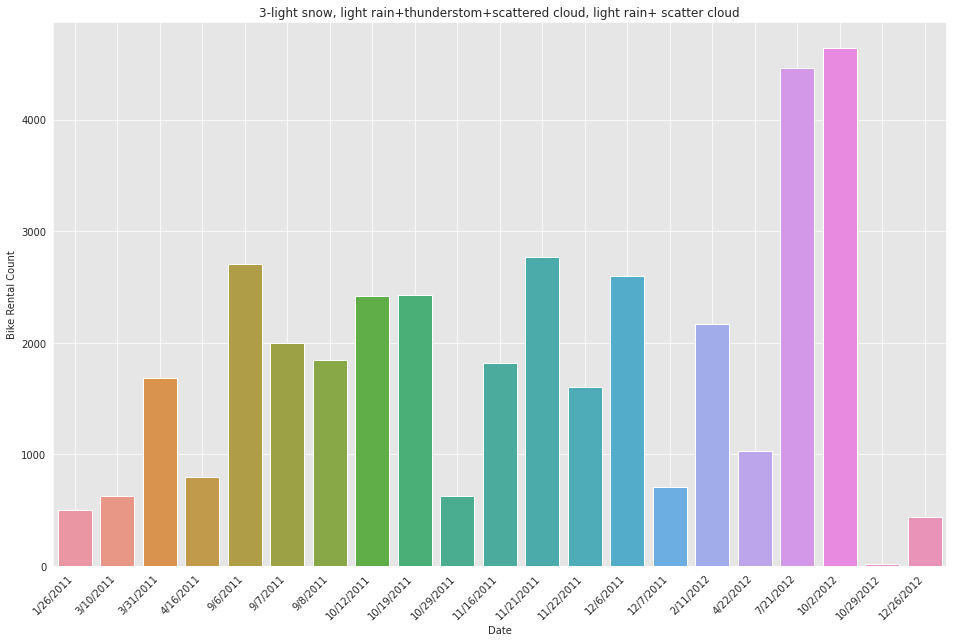

In [8]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
data_3 = data.loc[data["weathersit"] ==3]
chart = sns.barplot(data=data_3, x="dteday", y="cnt")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("3-light snow, light rain+thunderstom+scattered cloud, light rain+ scatter cloud")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Bike Rental Count")

Text(0, 0.5, 'Bike Rental Count')

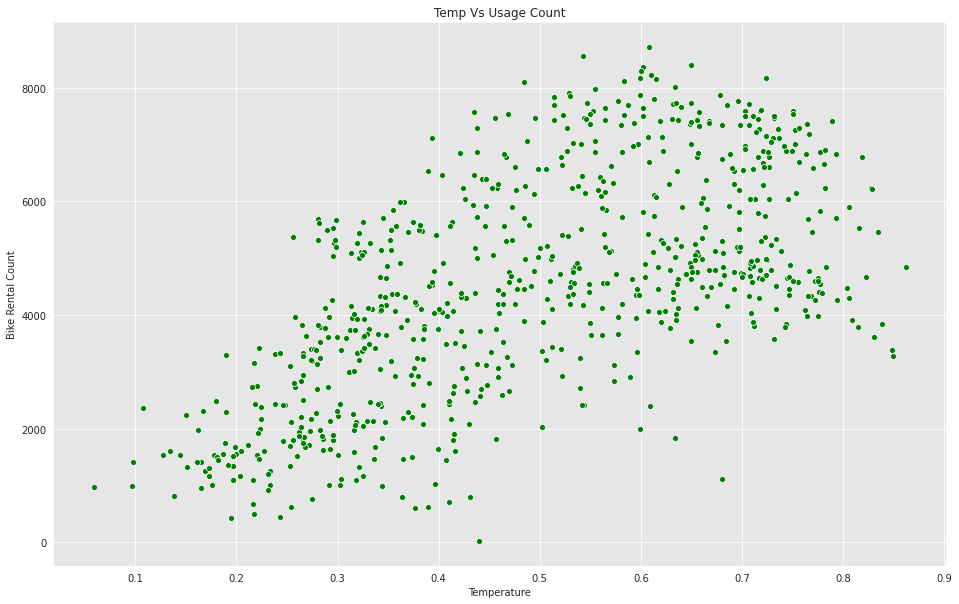

In [9]:
plt.figure(figsize=(16,10))
plt.title("Temp Vs Usage Count")
sns.scatterplot(data=data, x="temp", y="cnt", legend="full", color="green")
plt.xlabel("Temperature")
plt.ylabel("Bike Rental Count")

#Clean Up

Text(0.5, 1.0, 'Missing Value Graphical')

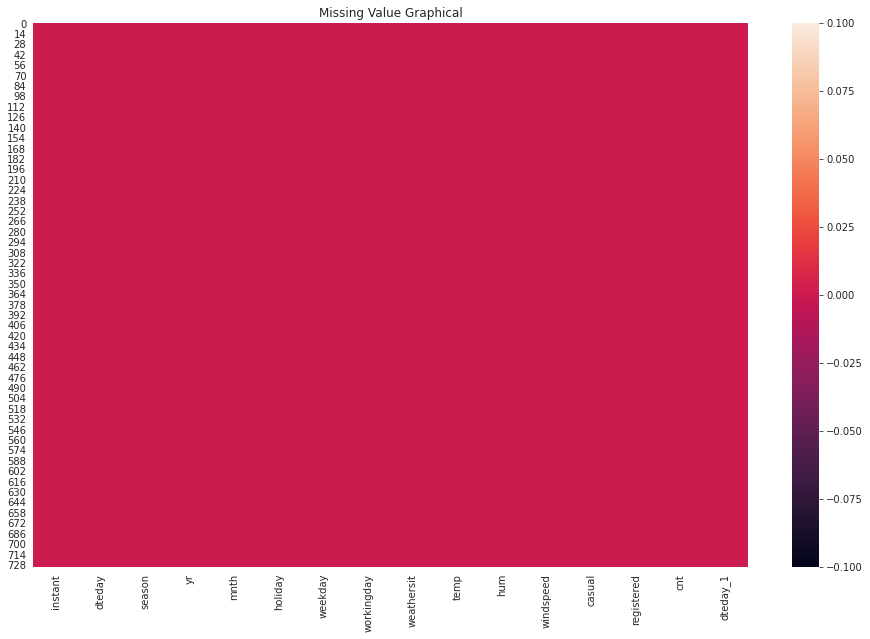

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(data.isnull())
plt.title("Missing Value Graphical")

In [11]:
bike_data = data.drop(labels=["instant", "casual", "registered", "dteday_1"], axis=1)
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [12]:
bike_data.dteday = pd.to_datetime(bike_data.dteday, format='%m/%d/%Y')
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [13]:
bike_data.index = pd.DatetimeIndex(bike_data.dteday)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [14]:
bike_data.drop(labels=["dteday"], axis=1, inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Text(0.5, 0, 'Week')

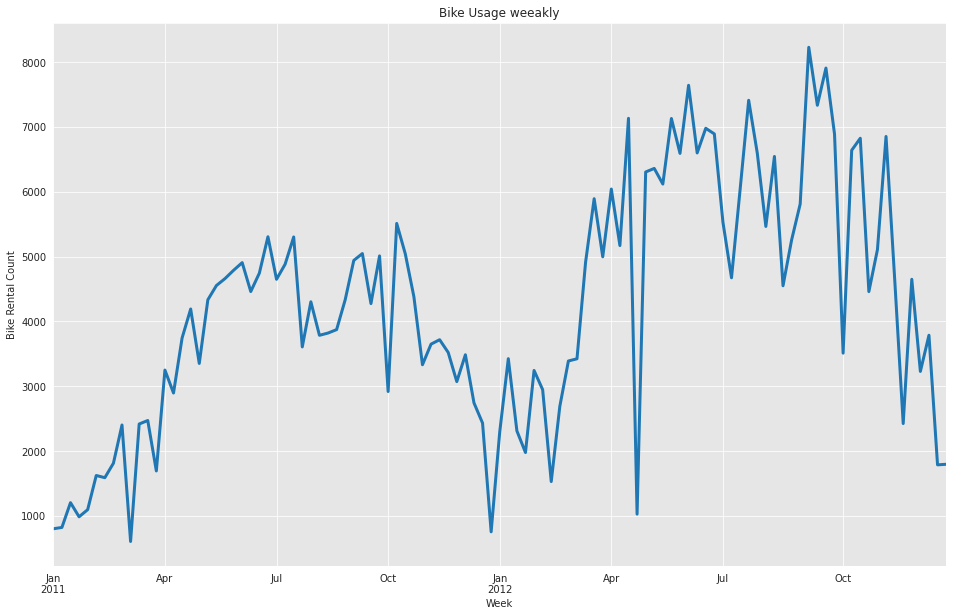

In [15]:
plt.figure(figsize=(16,10))
bike_data["cnt"].asfreq('w').plot(linewidth=3)
plt.title("Bike Usage weeakly")
plt.ylabel("Bike Rental Count")
plt.xlabel("Week")

Text(0.5, 0, 'Month')

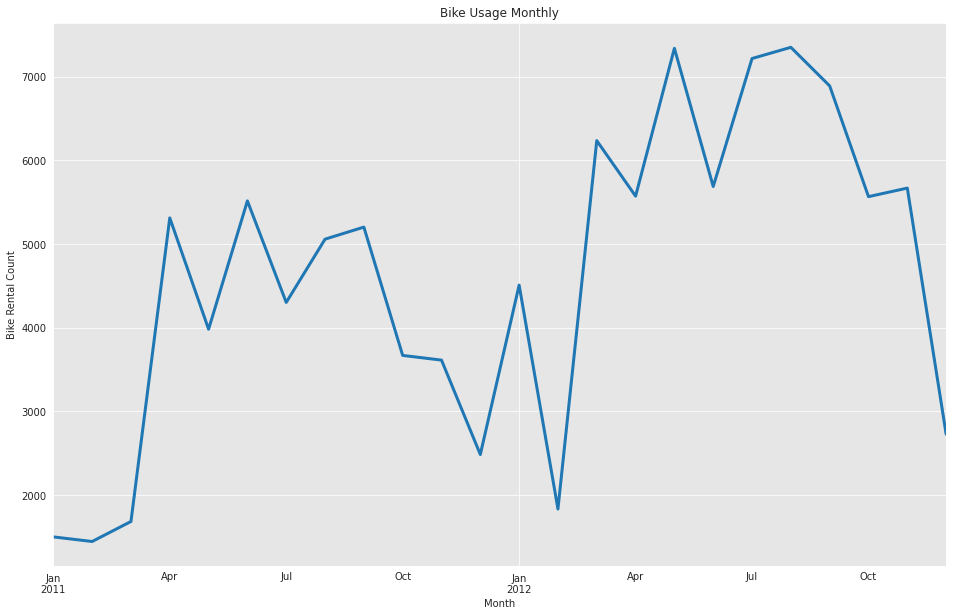

In [16]:
plt.figure(figsize=(16,10))
bike_data["cnt"].asfreq('M').plot(linewidth=3)
plt.title("Bike Usage Monthly")
plt.ylabel("Bike Rental Count")
plt.xlabel("Month")

Text(0.5, 0, 'Quaterly')

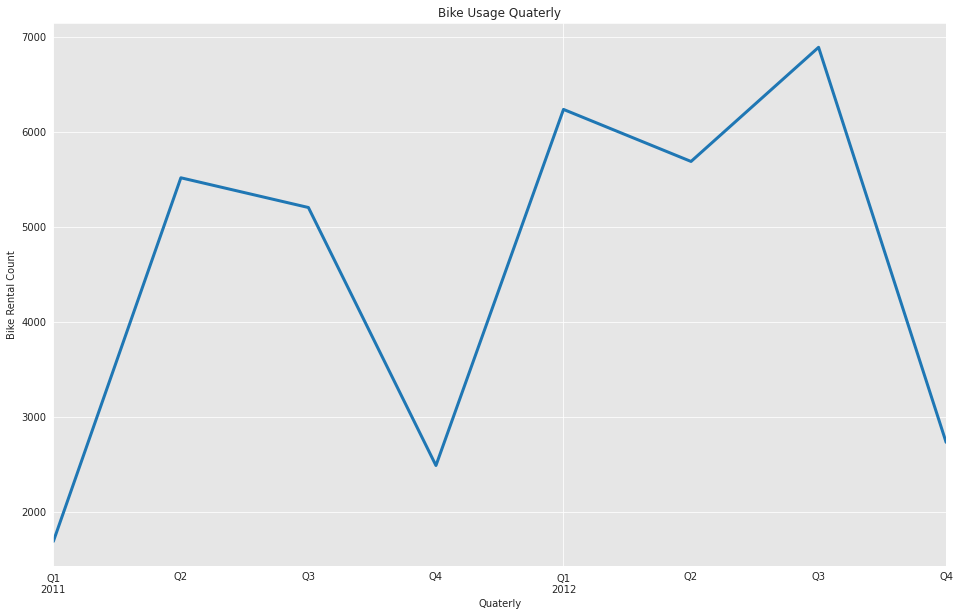

In [17]:
plt.figure(figsize=(16,10))
bike_data["cnt"].asfreq('Q').plot(linewidth=3)
plt.title("Bike Usage Quaterly")
plt.ylabel("Bike Rental Count")
plt.xlabel("Quaterly")

In [18]:
x_bike_numerical = bike_data[["temp", "hum", "windspeed","cnt"]]
x_bike_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


<Figure size 1440x720 with 0 Axes>

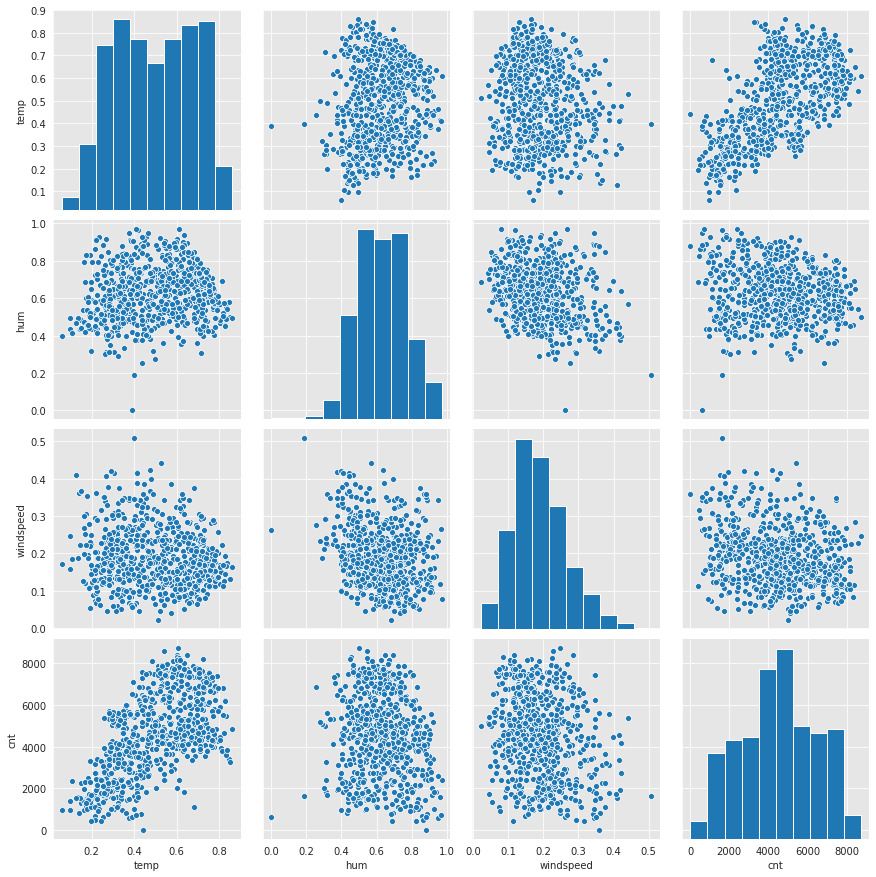

In [19]:
plt.figure(figsize=(20, 10))
sns.pairplot(x_bike_numerical,palette="Set1", height=3)

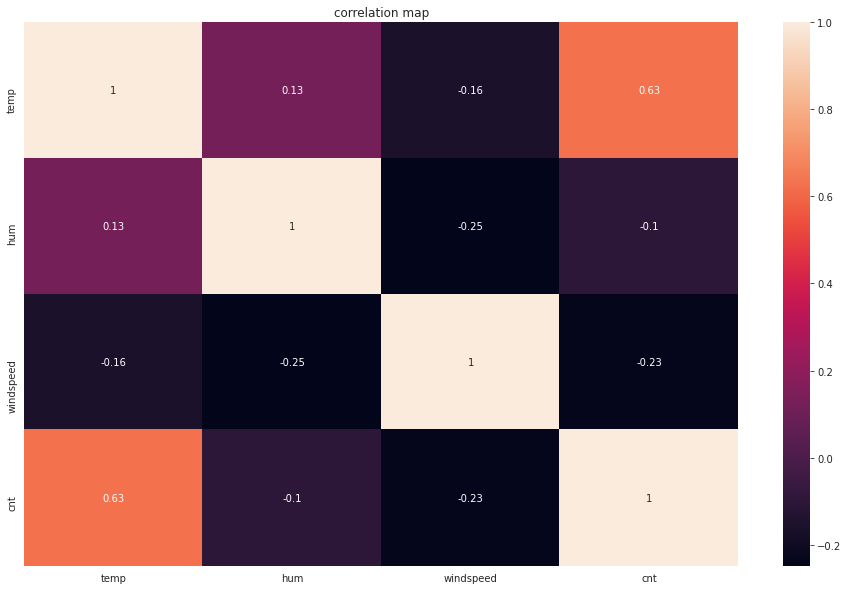

In [20]:
plt.figure(figsize=(16, 10))
plt.title("correlation map")
sns.heatmap(x_bike_numerical.corr(), annot=True)

In [21]:
x_bike_categorical = bike_data[list(bike_data.columns.drop(x_bike_numerical.columns).values)]
x_bike_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


#Data Conversion

using OneHotEncoder categorical data to ones and zero

In [22]:
x_bike_categorical.shape

(731, 7)

In [23]:
one_hard_encoder = OneHotEncoder()
x_bike_categorical = one_hard_encoder.fit_transform(x_bike_categorical).toarray()
x_bike_categorical

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [24]:
x_bike_categorical.shape

(731, 32)

In [25]:
x_bike_categorical = pd.DataFrame(x_bike_categorical)
x_bike_categorical.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
x_bike_numerical = x_bike_numerical.reset_index()
x_bike_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


Concat nemerical and categorical

In [27]:
x_bike_all = pd.concat([x_bike_categorical, x_bike_numerical], axis=1)
x_bike_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [28]:
x_bike_all.drop('dteday', axis=1, inplace=True)
x_bike_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


Spliting Data

In [29]:
x_data = x_bike_all.iloc[:,:-1].values
y_data = x_bike_all.iloc[:,-1:].values

In [30]:
x_data

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [31]:
y_data[:10]

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321]])

In [32]:
x_data.shape

(731, 35)

In [33]:
y_data.shape

(731, 1)

Normalize y_data



In [78]:
scaller = MinMaxScaler()
y_normalize_data = scaller.fit_transform(y_data)
y_normalize_data[:10]

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777]])

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_normalize_data, test_size=0.2)
print(" x_train shape",x_train.shape,"\n x_test shape", x_test.shape,"\n y_train shape",y_train.shape,"\n y_test shape", y_test.shape)

 x_train shape (584, 35) 
 x_test shape (147, 35) 
 y_train shape (584, 1) 
 y_test shape (147, 1)


In [98]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
#model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [100]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer="Adam", loss="mean_squared_error")

In [102]:
epohos_hist = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1000 - val_loss: 0.0414
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0229
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0179
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0131
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0095
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0096
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0091
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0092
Epoch 11

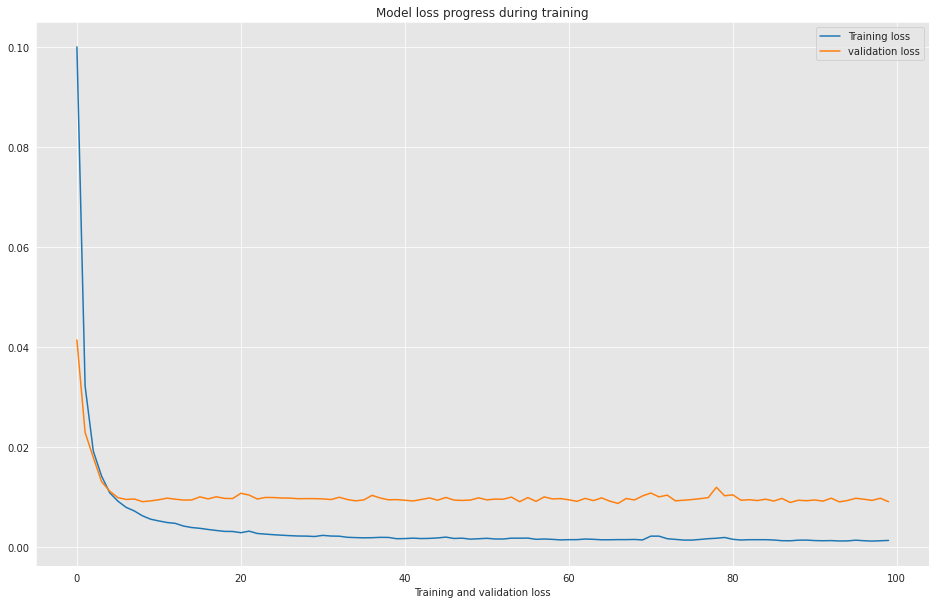

In [103]:
plt.figure(figsize=(16,10))
plt.title("Model loss progress during training")
plt.plot(epohos_hist.history["loss"])
plt.plot(epohos_hist.history["val_loss"])
plt.xlabel("Training and validation loss")
plt.legend(["Training loss","validation loss"])

In [120]:
y_predict = model.predict(x_test)
y_predict[:10]

array([[0.47353914],
       [0.5694194 ],
       [0.6604566 ],
       [0.8528273 ],
       [0.5064518 ],
       [0.56628215],
       [0.77571595],
       [0.6287875 ],
       [0.41767955],
       [0.28040525]], dtype=float32)

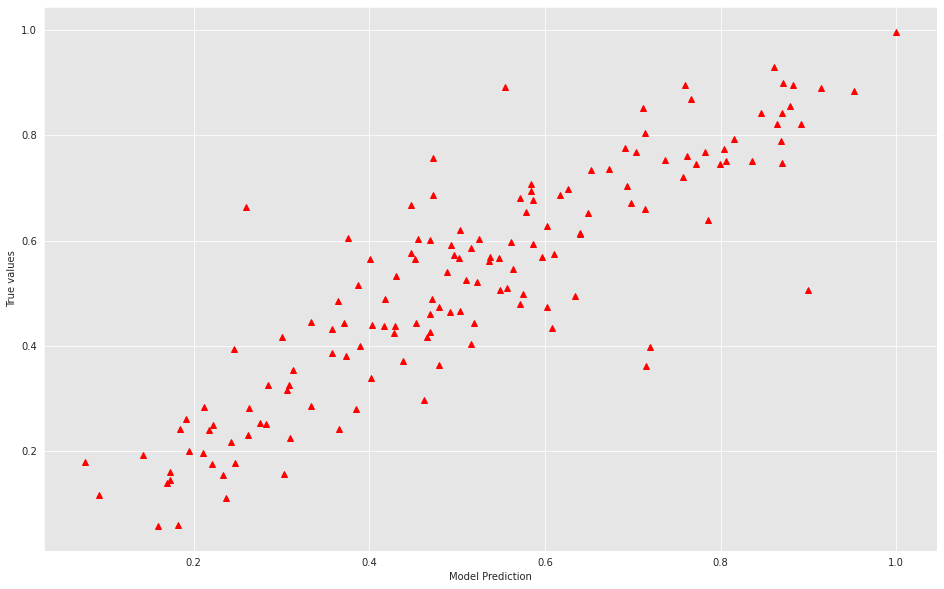

In [118]:
plt.figure(figsize=(16,10))
plt.ylabel("True values")
plt.xlabel("Model Prediction")
plt.plot(y_test, y_predict,"^",color="r" )

#convert Normalize to Inverse

In [119]:
inverse_y_predict = scaller.inverse_transform(y_predict)
inverse_y_predict[:10]

array([[4138.002 ],
       [4971.393 ],
       [5762.6885],
       [7434.775 ],
       [4424.0786],
       [4944.1245],
       [6764.523 ],
       [5487.421 ],
       [3652.4705],
       [2459.2825]], dtype=float32)

In [121]:
inverse_y_test = scaller.inverse_transform(y_test)
inverse_y_test[:10]

array([[5255.],
       [5204.],
       [6230.],
       [6207.],
       [7836.],
       [4785.],
       [6034.],
       [5260.],
       [4067.],
       [3368.]])

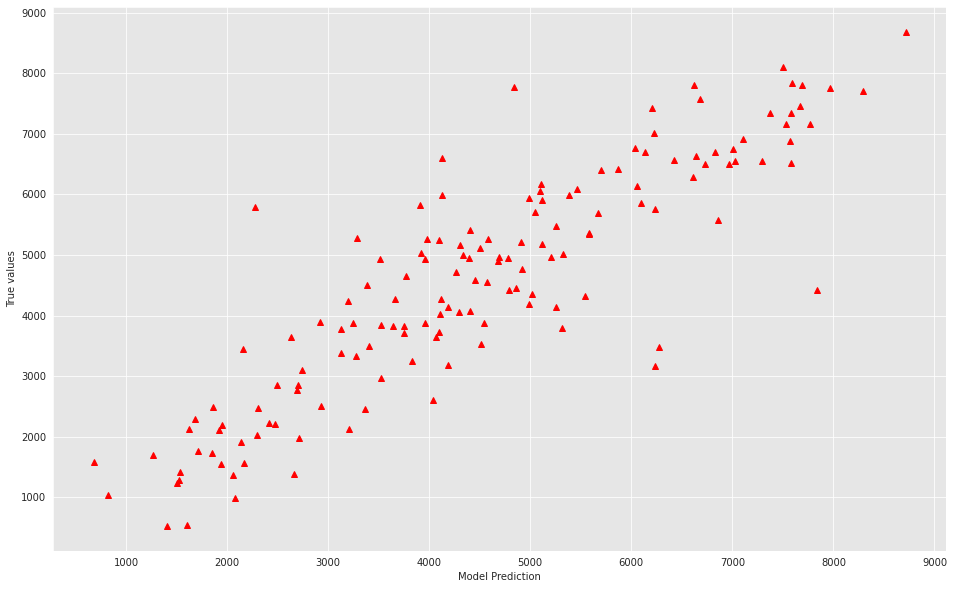

In [122]:
plt.figure(figsize=(16,10))
plt.ylabel("True values")
plt.xlabel("Model Prediction")
plt.plot(inverse_y_test, inverse_y_predict,"^",color="r" )

In [126]:
RMSE = float(format(np.sqrt(mean_squared_error(inverse_y_test, inverse_y_predict)), '3f'))
RMSE

928.78778

In [136]:
n = len(x_test)
k = x_test.shape[1]
MSE = mean_squared_error(inverse_y_test, inverse_y_predict)
MAE = mean_absolute_error(inverse_y_test, inverse_y_predict)
r2_scores = r2_score(inverse_y_test, inverse_y_predict) 
adj_r2_score = 1-(1-r2_scores)*(n-1)/(n-k-1)

In [139]:
print("RMSE is          :- ", RMSE)
print("MSEE is          :- ", MSE)
print("MAE is           :- ", MAE)
print("r2_scores is     :- ", r2_scores)
print("adj_r2_score is  :- ", adj_r2_score)

RMSE is          :-  928.78778
MSEE is          :-  862646.7409213516
MAE is           :-  663.2318306228741
r2_scores is     :-  0.7508791059372207
adj_r2_score is  :-  0.6723274726741822
